## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
combineddata = pd.merge(mouse_metadata, study_results, how = "left", on="Mouse ID")

# Display the data table for preview
combineddata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice.
micenumber = len(combineddata["Mouse ID"].unique())
print(f"Number of mice in this study: {micenumber}")

Number of mice in this study: 249


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = combineddata.loc[combineddata.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mice ID: {duplicatemice}")

# Optional: Get all the data for the duplicate mouse ID.
duplicatemiceall = combineddata[combineddata.duplicated(["Mouse ID", "Timepoint"])]
duplicatemiceall

Duplicate Mice ID: ['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
alldata = combineddata.drop_duplicates(subset=["Mouse ID", "Timepoint"])
alldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame and showing new index after resetting it.
micenumber = len(alldata["Mouse ID"].unique())
print(f"Number of mice in the clean dataframe: {micenumber}")


Number of mice in the clean dataframe: 249


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
data_mean = alldata.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
data_mean

data_median = alldata.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
data_median

data_variance = alldata.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
data_variance

data_std= alldata.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
data_std

data_sem = alldata.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
data_sem

# Assemble the resulting series into a single summary dataframe.
statistics1 = pd.DataFrame({"Mean": data_mean, "Median":data_median, "Variance":data_variance, 
                               "Standard Deviation": data_std, "SEM": data_sem})
statistics1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
statistics2 = alldata.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
statistics2 = statistics2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})



## Bar and Pie Charts

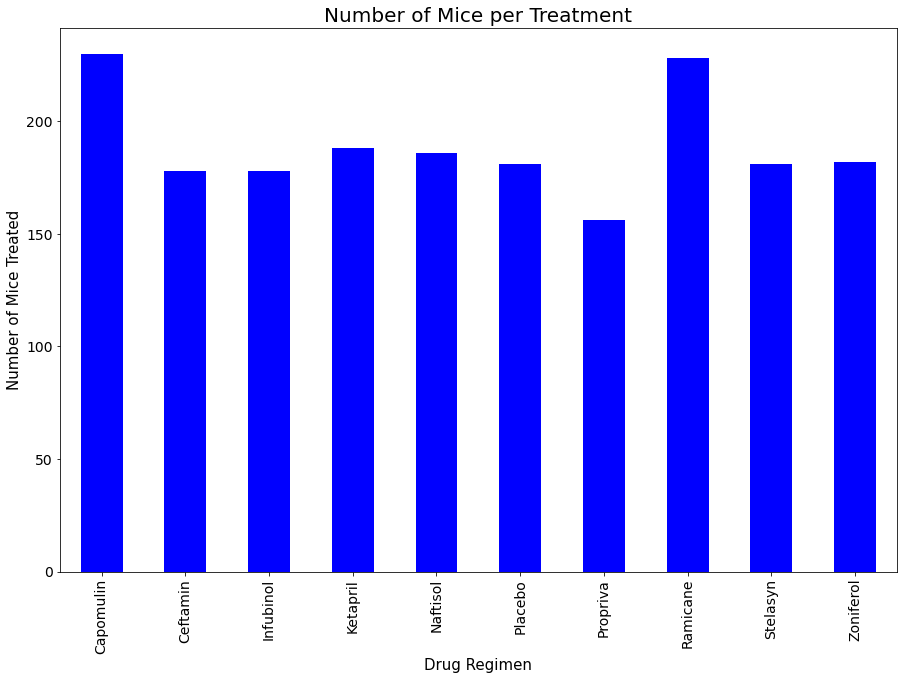

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
druggedmice = alldata.groupby(["Drug Regimen"]).count()["Mouse ID"]

plotusingpandas = druggedmice.plot(kind="bar", color='b', figsize=(15,10), fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)

plt.show()



[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

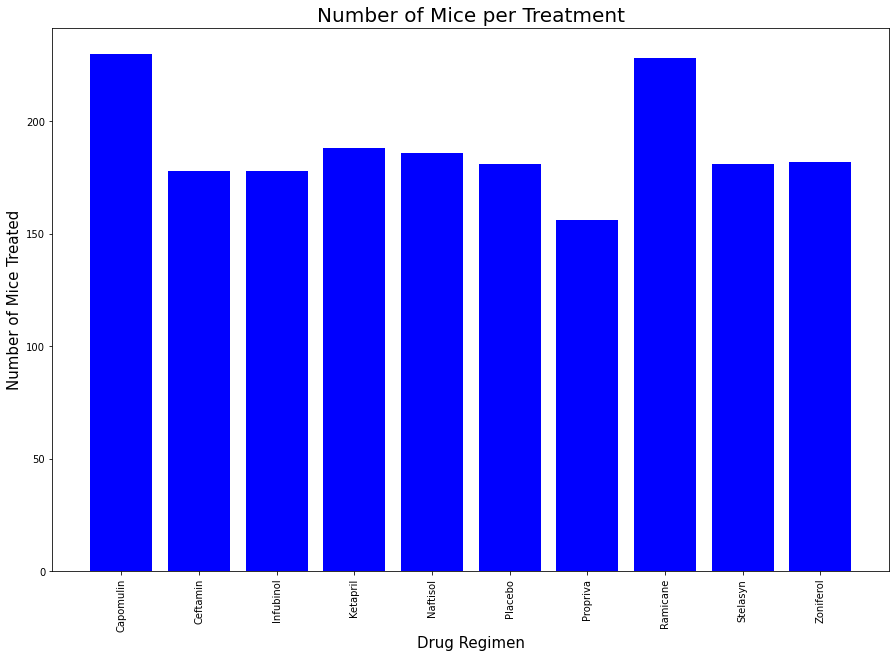

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
micetreatment = (alldata.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
micetreatment

x_axis = np.arange(len(druggedmice))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(tick_locations, druggedmice.index.values, rotation="vertical")
plt.bar(x_axis, micetreatment, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)


micetreatment



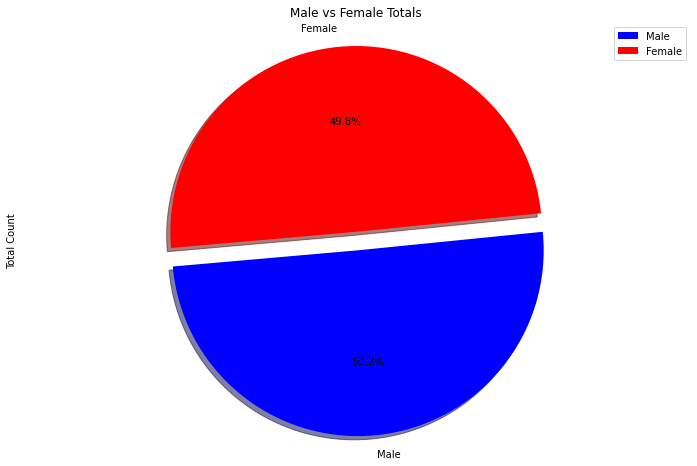

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandagender = alldata.loc[:, ["Sex", "Mouse ID"]]
pandagender = pandagender.drop_duplicates()
pandacount = pandagender["Sex"].value_counts()

# Creating Dataframe
datagender = pd.DataFrame({"Total Count": pandacount})

# Pieplot formula showing distribution of Male vs Female mice
colors = ["blue", "red"]
explode = (0.1, 0)
genderpie = datagender.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="Male vs Female Totals", 
                                            startangle=185, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()


In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [51]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
